In [1]:
# Exploratory Data Analysis of Spotify Streaming Data

## Author: Prince Kumar
## Date: 22.09.2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\princ\OneDrive\Desktop\artists.csv")

In [4]:
df

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"
...,...,...,...,...,...,...
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1
2998,Kings of Convenience,728.6,0.252,728.6,618.9,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   object 
 2   Daily       2994 non-null   float64
 3   As lead     2984 non-null   object 
 4   Solo        2931 non-null   object 
 5   As feature  2662 non-null   object 
dtypes: float64(1), object(5)
memory usage: 140.8+ KB


In [6]:
# Now lets convert "Streams" column into a 'float' from 'object'.

In [7]:
df['Streams'] = df['Streams'].str.replace(',', '').astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   float64
 2   Daily       2994 non-null   float64
 3   As lead     2984 non-null   object 
 4   Solo        2931 non-null   object 
 5   As feature  2662 non-null   object 
dtypes: float64(2), object(4)
memory usage: 140.8+ KB


In [9]:
# 'Streams' got converted into 'float'. Now, lets do this for other columns as well.

In [10]:
df['As lead'] = df['As lead'].str.replace(',', '').astype(float)
df['Solo'] = df['Solo'].str.replace(',', '').astype(float)
df['As feature'] = df['As feature'].str.replace(',', '').astype(float)

In [11]:
df.dtypes

Artist         object
Streams       float64
Daily         float64
As lead       float64
Solo          float64
As feature    float64
dtype: object

In [12]:
# Alright, Now we can proceed to data cleaning.

In [13]:
df.isnull().sum()

Artist          0
Streams         0
Daily           6
As lead        16
Solo           69
As feature    338
dtype: int64

In [14]:
# Imputing Null values with zero.

In [15]:
df.fillna(0, inplace=True)

In [16]:
df.isnull().sum()

Artist        0
Streams       0
Daily         0
As lead       0
Solo          0
As feature    0
dtype: int64

In [17]:
# Now since the data has been cleaned. We can proceed towards analysing this dataset.

In [18]:
# Descriptive Statistics:

In [19]:
df.describe()

,Streams,Daily,As lead,Solo,As feature
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2914.439967,1.850813,2141.309000,1484.942700,773.132367
std,4826.306507,3.755436,3584.571655,2714.839837,1871.962004
min,728.600000,0.000000,0.000000,0.000000,0.000000
25%,961.200000,0.478750,747.100000,322.875000,27.300000
50%,1459.400000,0.869500,1104.050000,787.050000,229.700000
75%,2680.800000,1.768250,2070.925000,1516.975000,732.625000
max,85041.300000,85.793000,57252.600000,50425.700000,27788.700000


In [20]:
# Data Visualization

In [21]:
top_10_streamed_artists = df.sort_values(by='Streams', ascending=False).head(10)

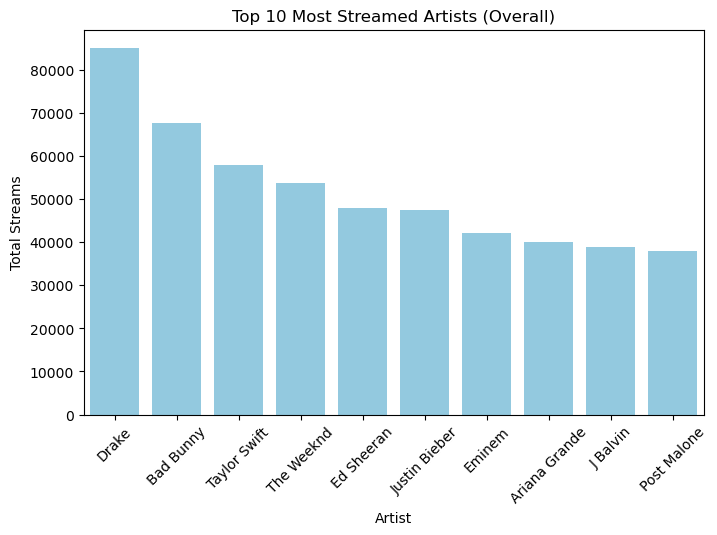

In [22]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Artist', y='Streams', data=top_10_streamed_artists, color='skyblue')
ax.tick_params(axis='x', rotation=45)
plt.ylabel('Total Streams')
plt.title('Top 10 Most Streamed Artists (Overall)')
plt.show()

In [23]:
top_10_daily_artists = df.sort_values(by='Daily', ascending=False).head(10)

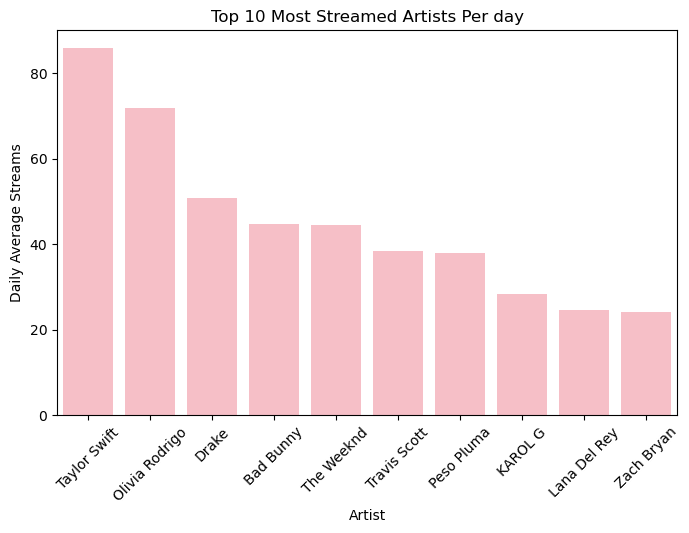

In [24]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Artist', y='Daily', data=top_10_daily_artists, errorbar=None, color='lightpink')
ax.tick_params(axis='x', rotation=45)
plt.ylabel('Daily Average Streams')
plt.title('Top 10 Most Streamed Artists Per day')
plt.show()

In [25]:
least_streamed_artists = df.sort_values(by='Streams', ascending=False).tail(10)

In [26]:
least_streamed_artists.sort_values(by='Streams', ascending=True, inplace=True)

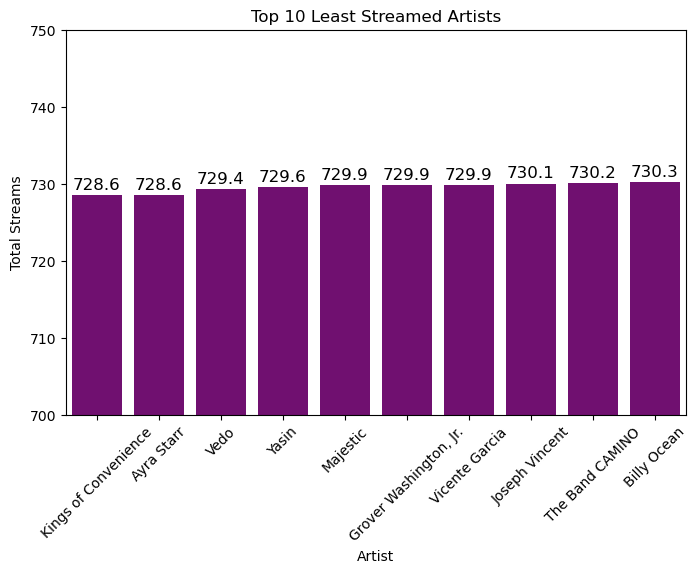

In [27]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Artist', y='Streams', data=least_streamed_artists, errorbar=None, color='purple')
ax.tick_params(axis='x', rotation=45)
# For loop for adding value labels on top on each bar in the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 7), textcoords='offset points')

plt.ylim(700, 750)

plt.ylabel('Total Streams')
plt.title('Top 10 Least Streamed Artists')

plt.show()

In [28]:
least_daily_streamed_artists = df.sort_values(by='Streams', ascending=False).tail(10)

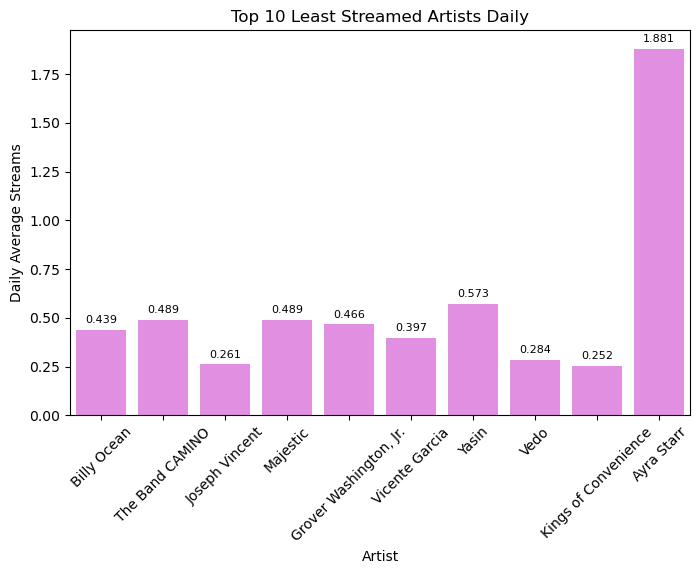

In [29]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Artist', y='Daily', data=least_daily_streamed_artists, errorbar=None, color='violet')
ax.tick_params(axis='x', rotation=45)
# Adding values on top of each bar

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha='center', va='center', color='black', fontsize=8, xytext=(0, 7), textcoords='offset points')

plt.ylabel('Daily Average Streams')
plt.title('Top 10 Least Streamed Artists Daily')
plt.show()

In [30]:
top_as_lead_artists = df.sort_values(by='As lead', ascending=False).head(10)

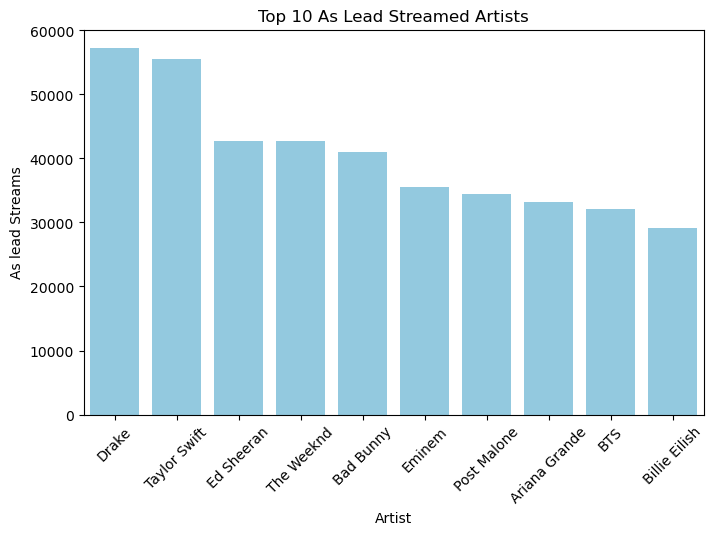

In [31]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Artist', y='As lead', data=top_as_lead_artists, color='skyblue')
ax.tick_params(axis='x', rotation=45)
plt.ylabel('As lead Streams')
plt.title('Top 10 As Lead Streamed Artists')
plt.show()

In [32]:
top_solo_artists = df.sort_values(by='Solo', ascending=False).head(10)

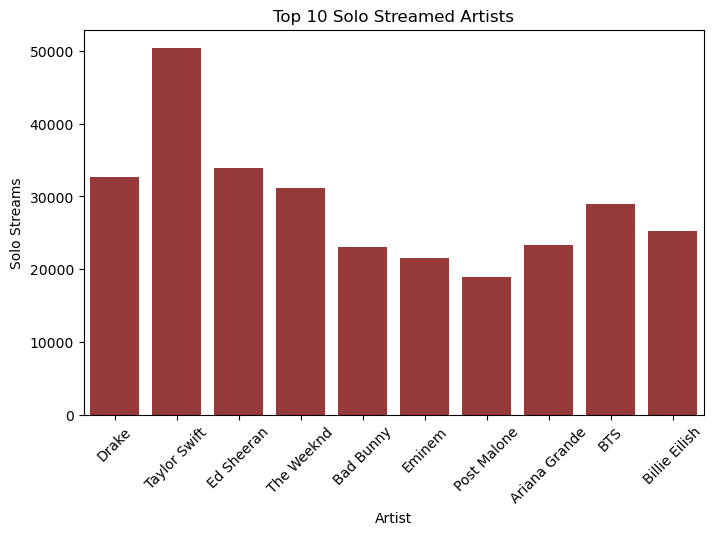

In [33]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Artist', y='Solo', data=top_as_lead_artists, color='brown')
ax.tick_params(axis='x', rotation=45)
plt.ylabel('Solo Streams')
plt.title('Top 10 Solo Streamed Artists')
plt.show()

In [34]:
top_featured_artists = df.sort_values(by='As feature', ascending=False).head(10)

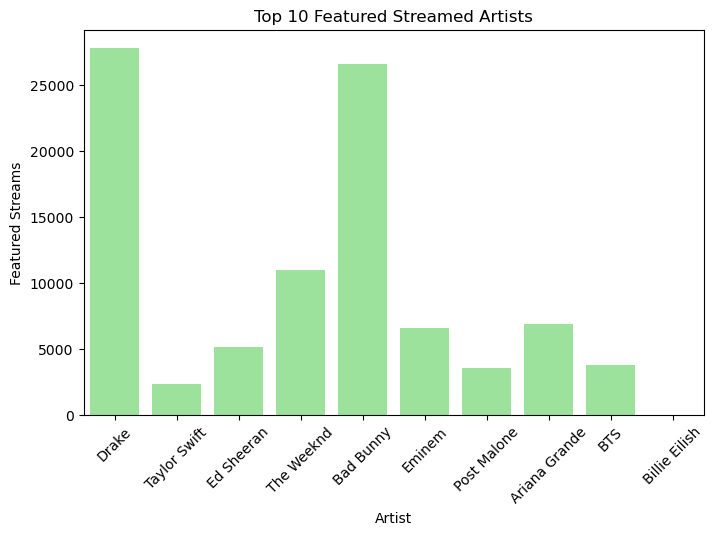

In [35]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Artist', y='As feature', data=top_as_lead_artists, color='lightgreen')
ax.tick_params(axis='x', rotation=45)
plt.ylabel('Featured Streams')
plt.title('Top 10 Featured Streamed Artists')
plt.show()

In [36]:
heatmap = df.corr(numeric_only=True)

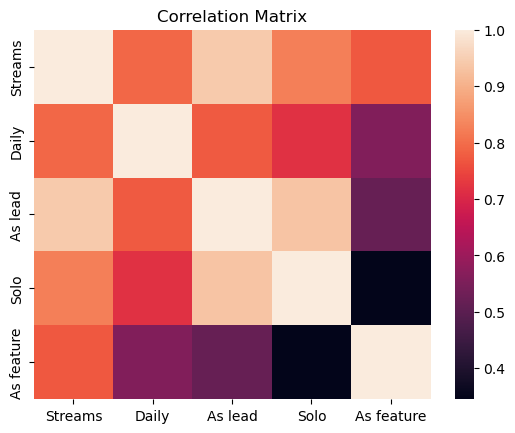

In [37]:
sns.heatmap(data=heatmap)
plt.title('Correlation Matrix')
plt.show()